# Breast Cancer Detection

In [2]:
#import statements
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from pathlib import Path
import cv2
from keras import backend as K
from keras.utils import plot_model
import pydot, graphviz
from IPython.display import Image
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [3]:
begin = 'Dataset/train/Begin'
alignant = 'Dataset/train/Malignant'
begin1 = Path(begin)
malignant1 = Path(alignant)

begin_name = begin1.glob('*.png') 
malignant_name = malignant1.glob('*.png') 
training_data = [] #Empty list to combine

for img in begin_name:
    training_data.append((img, 0))
for img in malignant_name:
    training_data.append((img, 1))

In [4]:
df = pd.DataFrame(training_data, columns = ['image_name', 'label'], index = None)
df.head()

,image_name,label
0,Dataset\train\Begin\SOB_B_A-14-22549G-200-029.png,0
1,Dataset\train\Begin\SOB_B_A-14-22549G-200-030.png,0
2,Dataset\train\Begin\SOB_B_A-14-22549G-200-031.png,0
3,Dataset\train\Begin\SOB_B_A-14-22549G-200-032.png,0
4,Dataset\train\Begin\SOB_B_A-14-22549G-400-001.png,0


In [5]:
df.shape

(6429, 2)

In [6]:
df['label'].value_counts()

1    4429
0    2000
Name: label, dtype: int64

Countplot of benign vs maligant patients.

Text(0,0.5,'Cancer VS Malignant')

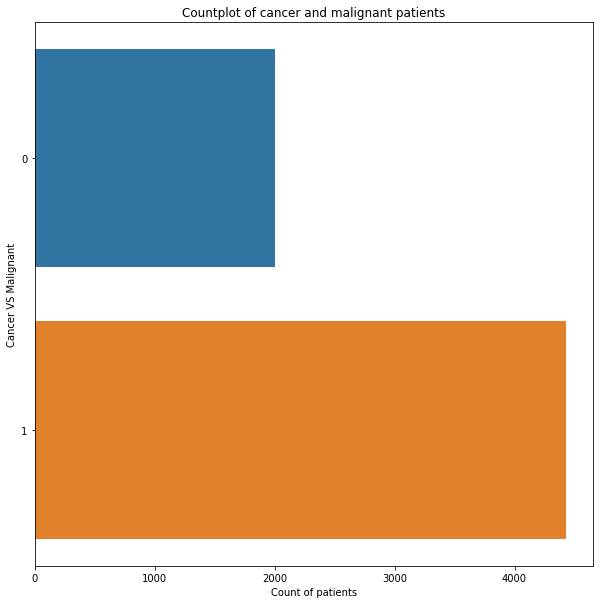

In [7]:
plt.figure(figsize = (10, 10))
sns.countplot(y = 'label', data =df)
plt.title('Countplot of cancer and malignant patients')
plt.xlabel('Count of patients')
plt.ylabel('Cancer VS Malignant')

In [8]:
begin_data = df[df['label'] == 0]['image_name'].iloc[:10].tolist()
malignant_data = df[df['label'] == 1]['image_name'].iloc[:10].tolist()

Text(0.5,1,'Malignant')

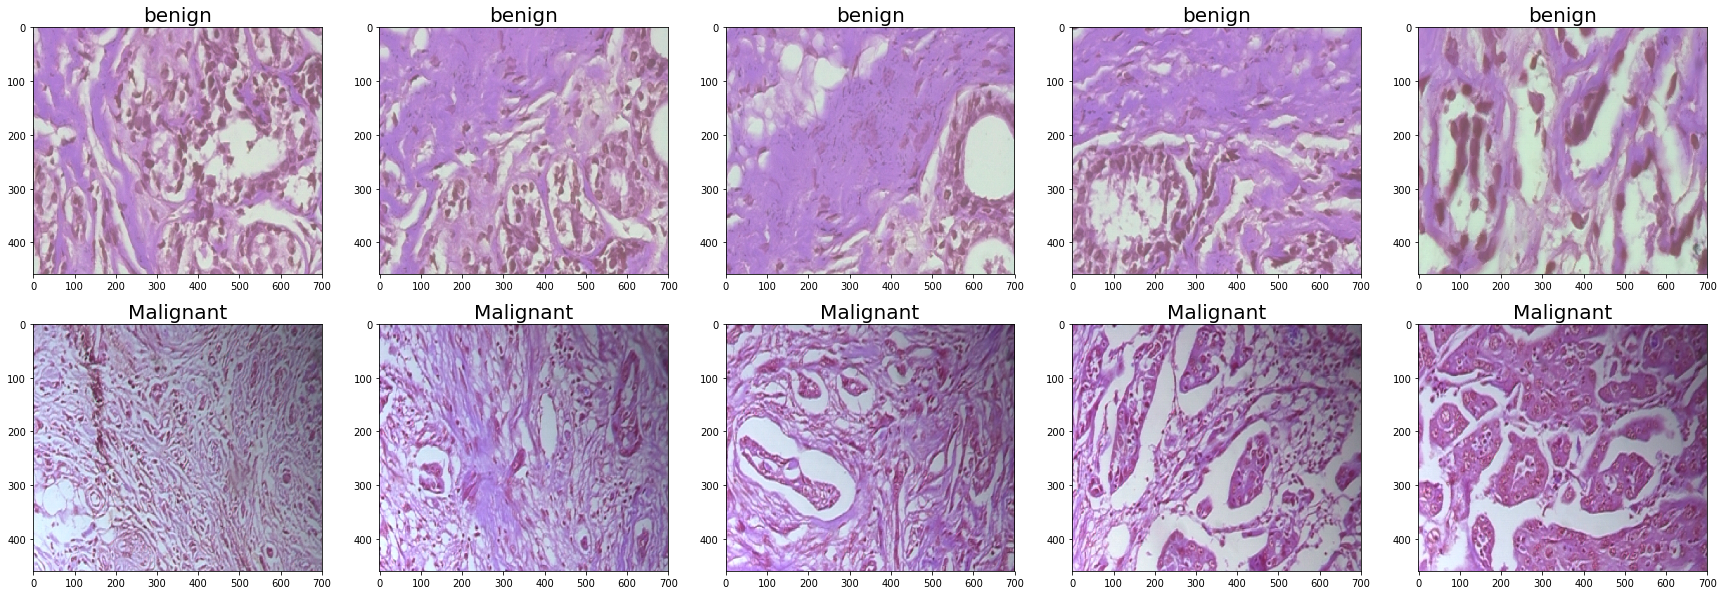

In [9]:
fig = plt.figure(figsize = (30, 10))
plt.subplot(2,5,1)
image = cv2.imread(str(begin_data[0]))
plt.imshow(image, aspect="auto")
plt.title('benign', fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(str(begin_data[1]))
plt.imshow(image, aspect="auto")
plt.title('benign', fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(str(begin_data[2]))
plt.imshow(image, aspect="auto")
plt.title('benign', fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(str(begin_data[3]))
plt.imshow(image, aspect="auto")
plt.title('benign', fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(str(begin_data[4]))
plt.imshow(image, aspect="auto")
plt.title('benign', fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(str(malignant_data[0]))
plt.imshow(image, aspect="auto")
plt.title('Malignant', fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(str(malignant_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Malignant', fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(str(malignant_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Malignant', fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(str(malignant_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Malignant', fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(str(malignant_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Malignant', fontsize = 20)

In [10]:
img_height, img_width = 256, 256
epochs = 5
batch_size = 64
train_dir ='Breast Cancer/Dataset/train'
validation_dir = 'Breast Cancer/Dataset/test'
nb_train_samples = 6452
nb_validation_samples = 1469

In [11]:
if K.image_data_format() == 'channel_first':
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

In [12]:
model = Sequential()

#first convolutional layer
model.add(Conv2D(32, (3,3), input_shape = input_shape, padding ='same'))
model.add(Activation('relu'))

#second convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu', padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

#third convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.5))

#fourth convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.5))

#flatten
model.add(Flatten())

#first dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))

#second dense layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.5))

#output layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 64)      256       
__________

In [14]:
#compiling the model
model.compile(optimizer =Adam(lr = 0.001, decay = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [15]:
train_datagen = ImageDataGenerator(
                rescale = 1. / 255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [19]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(img_width, img_height),
                batch_size=batch_size,
                class_mode='categorical')

Found 6452 images belonging to 2 classes.


In [20]:
for data, labels in train_generator:
    print(data.shape)
    print(labels.shape)
    print(labels)
    break

(32, 256, 256, 3)
(32, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [21]:
validation_generator = train_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(img_width, img_height),
                    batch_size=batch_size,
                    class_mode='categorical')

Found 1469 images belonging to 2 classes.


In [16]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                       verbose = 0,
                       mode = 'auto',
                       save_best_only = True,
                       monitor='val_loss')

In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, 
    callbacks=[checkpointer])

Epoch 1/5
100/100 [==============================] - 1413s 14s/step - loss: 0.5883 - accuracy: 0.7688 - val_loss: 2.1247 - val_accuracy: 0.6662
Epoch 2/5
100/100 [==============================] - 1180s 12s/step - loss: 0.5334 - accuracy: 0.7922 - val_loss: 1.0460 - val_accuracy: 0.6960
Epoch 3/5
100/100 [==============================] - 132s 1s/step - loss: 0.4685 - accuracy: 0.8106 - val_loss: 1.2979 - val_accuracy: 0.6847
Epoch 4/5
100/100 [==============================] - 118s 1s/step - loss: 0.4485 - accuracy: 0.8181 - val_loss: 1.0865 - val_accuracy: 0.6804
Epoch 5/5
100/100 [==============================] - 127s 1s/step - loss: 0.3943 - accuracy: 0.8394 - val_loss: 0.7209 - val_accuracy: 0.7389


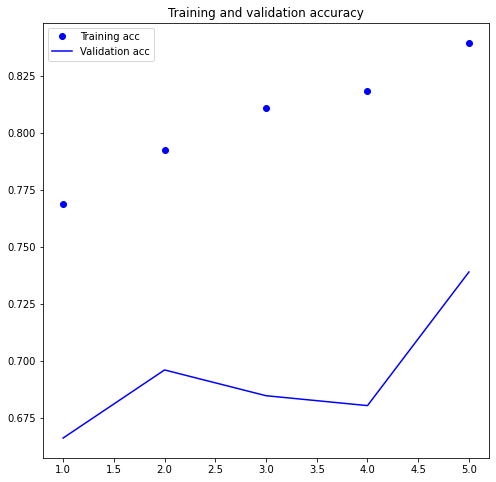

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (8, 8))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

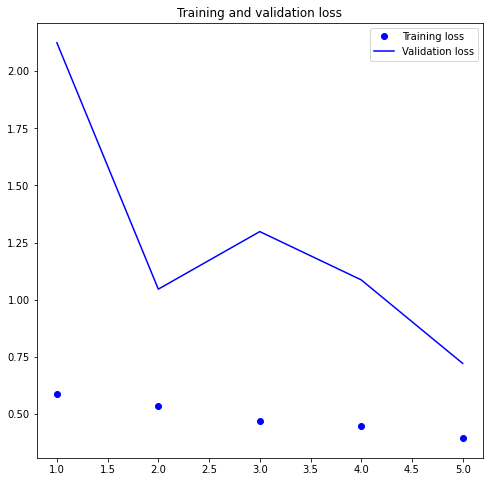

In [31]:
plt.figure(figsize = (8, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model = load_model('model.h5')

In [0]:
scores = model.evaluate_generator(validation_generator)

In [34]:
print("Loss on Test Data is", scores[0])
print("Accuracy on Test Data is", scores[1] * 100,"%")

Loss on Test Data is 0.9393670558929443
Accuracy on Test Data is 73.65554571151733 %


In [0]:
pred = model.predict_generator(validation_generator)

In [0]:
pred = np.argmax(pred, axis = 1)  

In [37]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
begin_test_dir = 'Dataset/test/Begin'
malignant_test_dir = 'Dataset/test/Malignant'

begin_test = Path(begin_test_dir).glob('*.png')
malignant_test = Path(malignant_test_dir).glob('*.png')

test_labels = []

for img in begin_test:
    label = to_categorical(0, num_classes = 2)
    test_labels.append(label)

for img in malignant_test:
    label = to_categorical(1, num_classes = 2) 
    test_labels.append(label)
    
test_labels = np.array(test_labels)

In [0]:
y_true = np.argmax(test_labels, axis = 1)

In [41]:
y_true

array([0, 0, 0, ..., 1, 1, 1])

([<matplotlib.axis.YTick at 0x7fc57d96b7f0>,
 [Text(0, 0, 'Begin'), Text(0, 0, 'Malignant')])

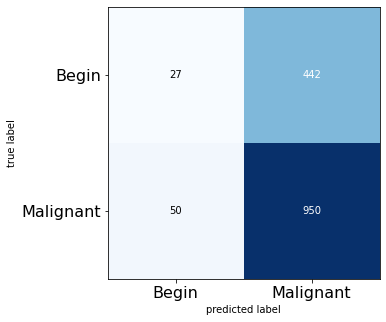

In [42]:
cm = confusion_matrix(y_true, pred)
plot_confusion_matrix(cm, figsize = (10, 5 ))
plt.xticks(range(2), ['Begin', 'Malignant'], fontsize=16)
plt.yticks(range(2), ['Begin', 'Malignant'], fontsize=16)

In [43]:
print("Precision : ",950 / (950 + 442))
print("Recall : ",950 / (950 + 50))

Precision :  0.6824712643678161
Recall :  0.95
